In [3]:

import numpy as np
from skimage import io as im
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import cv2

In [4]:
def psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))


def tv_loss(img, tv_weight):
    
    """
    Compute total variation loss.
    Inputs:
    - img: PyTorch Variable of shape (1, 3, H, W) holding an input image.
    - tv_weight: Scalar giving the weight w_t to use for the TV loss.
    Returns:
    - loss: PyTorch Variable holding a scalar giving the total variation loss
      for img weighted by tv_weight.
    """
    
    w_variance = torch.sum(torch.pow(img[:,:,:,:-1] - img[:,:,:,1:], 2))
    h_variance = torch.sum(torch.pow(img[:,:,:-1,:] - img[:,:,1:,:], 2))
    loss = tv_weight * (h_variance + w_variance)
    return loss

In [5]:
def norm(x):
    out = (x -0.5) *2
    return out.clamp(-1, 1)

def np2torch(x):
    #if opt.nc_im == 3:
    x = x[:, :, :, None]
    x = x.transpose((3, 2, 0, 1))/255
    
    """
    else:
    x = color.rgb2gray(x)
    x = x[:,:,None,None]
    x = x.transpose(3, 2, 0, 1)
    """
 
    x = torch.from_numpy(x)
    x =  x.type(torch.FloatTensor)
 
    x = norm(x)
    return x

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def convert_image_np(inp):
    if inp.shape[1]==3:
        inp = denorm(inp)
        inp = move_to_cpu(inp[-1,:,:,:])
        inp = inp.numpy().transpose((1,2,0))
    else:
        inp = denorm(inp)
        inp = move_to_cpu(inp[-1,-1,:,:])
        inp = inp.numpy().transpose((0,1))
  
    inp = np.clip(inp,0,1)
    return inp

def move_to_cpu(t):
    t = t.to(torch.device('cpu'))
    return t

def torch2uint8(x):
    x = x[0,:,:,:]
    x = x.permute((1,2,0))
    x = 255*denorm(x)
    x = x.cpu().numpy()
    x = x.astype(np.uint8)
    return x

In [6]:
def compare_images(im1_path, im2_path):
    im1 = cv2.imread(im1_path)
    im2 = cv2.imread(im2_path)
    
  
    im1 = cv2.resize(im1, (im2.shape[1], im2.shape[0]))

    plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
    plt.show()
    
        
    loss_L1 = nn.L1Loss()
    loss_L2 = nn.MSELoss()
    
    
    
    print("The PSNR loss between the two images is:", psnr(im1, im2)/100)
    
    im1 = transforms.ToTensor()(im1).unsqueeze_(0)
    im2 = transforms.ToTensor()(im2).unsqueeze_(0)

  
    print("The L1 loss between the two images is:", loss_L1(im1, im2))
    print("The L2 loss between the two images is:", loss_L2(im1, im2))
    print("Total variation for image1:", tv_loss(im1, 0.1))
    print("Total variation for image2:", tv_loss(im2, 0.1))

In [25]:
im1_path = "results_for_report/landscape_ground_truth.jpg"
im2_path = "results_for_report/landscape_patchmatch.png"
im3_path = "results_for_report/landscape_inpainting=patchmatch.png"
im4_path = "results_for_report/landscape_inpainting=gradual_blur.png"
im5_path = "results_for_report/start_scale=2_init=random_inpainted.png"

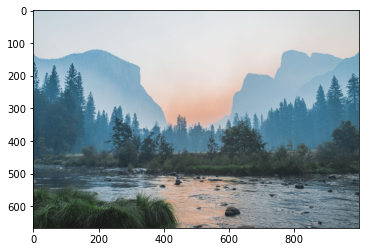

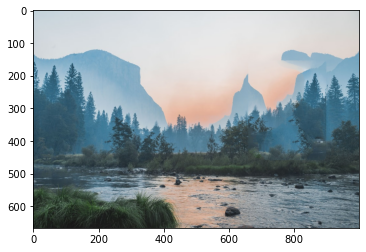

(667, 1000, 3)
(667, 1000, 3)
im1 (667, 1000, 3)
im2 (667, 1000, 3)
The PSNR loss between the two images is: 0.2631336966638647
The L1 loss between the two images is: tensor(0.0135)
The L2 loss between the two images is: tensor(0.0023)
Total variation for image1: tensor(678.6271)
Total variation for image2: tensor(690.2665)


In [21]:
#patchmatch
compare_images(im1_path, im2_path)

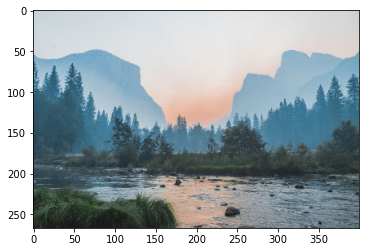

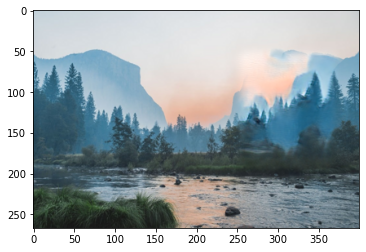

(267, 400, 3)
(267, 400, 3)
im1 (267, 400, 3)
im2 (267, 400, 3)
The PSNR loss between the two images is: 0.2436035030978403
The L1 loss between the two images is: tensor(0.0254)
The L2 loss between the two images is: tensor(0.0037)
Total variation for image1: tensor(182.8257)
Total variation for image2: tensor(109.0586)


In [22]:
# inpainting patchmatch
compare_images(im1_path, im3_path)

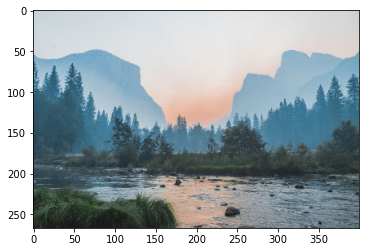

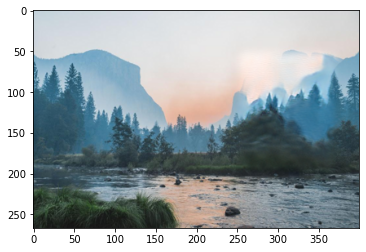

(267, 400, 3)
(267, 400, 3)
im1 (267, 400, 3)
im2 (267, 400, 3)
The PSNR loss between the two images is: 0.234120432534387
The L1 loss between the two images is: tensor(0.0295)
The L2 loss between the two images is: tensor(0.0046)
Total variation for image1: tensor(182.8257)
Total variation for image2: tensor(108.0348)


In [23]:
# inpainting gradual blur
compare_images(im1_path, im4_path)

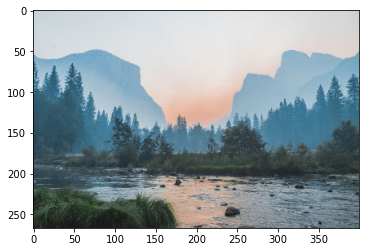

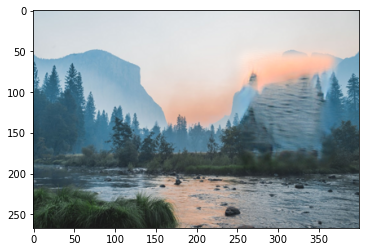

(267, 400, 3)
(267, 400, 3)
im1 (267, 400, 3)
im2 (267, 400, 3)
The PSNR loss between the two images is: 0.25014837938977835
The L1 loss between the two images is: tensor(0.0245)
The L2 loss between the two images is: tensor(0.0032)
Total variation for image1: tensor(182.8257)
Total variation for image2: tensor(107.9645)


In [26]:
# inpainting mean
compare_images(im1_path, im5_path)